<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/figure8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

max min x tensor(30.4315) tensor(1.5623)
max min y tensor(29.2254) tensor(2.5811)


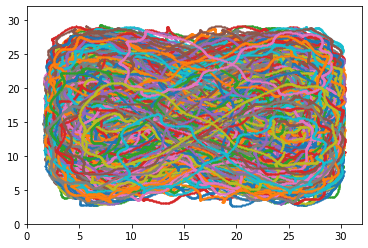

In [2]:
length = 1000
numpoints = 1000
x = torch.zeros(length,numpoints)
y = torch.zeros(length,numpoints)
for i in range(1000):
  t = torch.linspace(0,2*3.14159,1000)
  x[i,:] = t.cos()
  y[i,:] = t.sin()*t.cos()

  WIDTH = 14
  randMultx = np.random.uniform(8.0,WIDTH-.1)
  randMulty = np.random.uniform(8.0,WIDTH-.1)

  maxaddx = WIDTH-randMultx
  maxaddy = 3.0+WIDTH-randMulty
  
  assert maxaddx >0
  assert maxaddy >0

  randAddx = np.random.uniform(-maxaddx,maxaddx)
  randAddy = np.random.uniform(-maxaddy,maxaddy)

  randMultSinx = np.random.uniform(.25,.5)
  randMultSiny = np.random.uniform(.25,.5)
  randMultFreqSinx = np.random.uniform(10.0,20.0)
  randMultFreqSiny = np.random.uniform(10.0,20.0)
  #randAddSinx = np.random.uniform(0.0,1.0)
  #randAddSiny = np.random.uniform(0.0,1.0)
  xsin = randMultSiny*((t*randMultFreqSinx).sin())#+randAddSinx
  ysin = randMultSiny*((t*randMultFreqSiny).sin())#+randAddSiny
  #print('maxxsin',torch.max(xsin))
  x[i,:] = (x[i,:]*randMultx)+16+randAddx+xsin
  y[i,:] = (y[i,:]*randMulty)+16+randAddy+ysin
  
  plt.scatter(x[i,:],y[i,:],s=1)
  plt.xlim(0,32)
  plt.ylim(0,32)
  #plt.show()
  
print("max min x",torch.max(x),torch.min(x))
print("max min y",torch.max(y),torch.min(y))
assert torch.max(x).item() < 32
assert torch.min(x).item() > 0
assert torch.max(y).item() < 32
assert torch.min(y).item() > 0

plt.show()

max min x tensor(30.3515) tensor(1.7033)
max min y tensor(28.7298) tensor(2.7795)


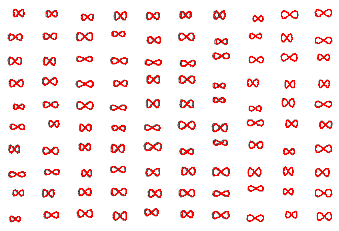

In [3]:
#add donut here
import torch
import numpy as np
import pylab as plt
from skimage import filters
import math

global numpoints
numpoints = 1000
side = 32

rows = torch.zeros(32,32)
columns = torch.zeros(32,32)


for i in range(32):
    columns[:,i] = i
    rows[i,:] = i


def donut_matrix(length = 10):
    
    canvas = torch.zeros((length,side, side))
    x = torch.zeros((length,numpoints))
    y = torch.zeros((length,numpoints))
        
    ###

    for i in range(length):
      t = torch.linspace(0,2*3.14159,numpoints)
      x[i,:] = t.cos()
      y[i,:] = t.sin()*t.cos()

      WIDTH = 14
      randMultx = np.random.uniform(8.0,WIDTH-.1)
      randMulty = np.random.uniform(8.0,WIDTH-.1)

      maxaddx = WIDTH-randMultx
      maxaddy = 3.0+WIDTH-randMulty
      
      assert maxaddx >0
      assert maxaddy >0

      randAddx = np.random.uniform(-maxaddx,maxaddx)
      randAddy = np.random.uniform(-maxaddy,maxaddy)

      randMultSinx = np.random.uniform(.25,.5)
      randMultSiny = np.random.uniform(.25,.5)
      randMultFreqSinx = np.random.uniform(10.0,20.0)
      randMultFreqSiny = np.random.uniform(10.0,20.0)
      #randAddSinx = np.random.uniform(0.0,1.0)
      #randAddSiny = np.random.uniform(0.0,1.0)
      xsin = randMultSiny*((t*randMultFreqSinx).sin())#+randAddSinx
      ysin = randMultSiny*((t*randMultFreqSiny).sin())#+randAddSiny
      #print('maxxsin',torch.max(xsin))
      x[i,:] = (x[i,:]*randMultx)+16+randAddx+xsin
      y[i,:] = (y[i,:]*randMulty)+16+randAddy+ysin
  
    assert torch.max(x).item() < 32
    assert torch.min(x).item() > 0
    assert torch.max(y).item() < 32
    assert torch.min(y).item() > 0
    
    print("max min x",torch.max(x),torch.min(x))
    print("max min y",torch.max(y),torch.min(y))
    ###
    
    assert x.shape == (length,numpoints)
    assert y.shape == (length,numpoints)
    assert torch.sum(x[x>(side-1)])==0 
    assert torch.sum(x[x<0])==0 
    assert torch.sum(y[y>(side-1)])==0 
    assert torch.sum(y[y<0])==0 
    
    points = torch.zeros(length,numpoints,2)
    for l in range(length):
        canvas[l,y[l,:].type(torch.LongTensor),x[l,:].type(torch.LongTensor)]=1.0
        points[l,:,0] = x[l,:]#modified for lstm discriminator
        points[l,:,1] = y[l,:]#modified for lstm discriminator 
    
    
    return {
        'canvas': canvas, 
        'points':points.type(torch.FloatTensor)}


def plot_all( sample = None, model = None, labels = None):
    img = sample[:,:].squeeze().cpu().numpy()
    plt.imshow(img, cmap=plt.cm.gray_r)
    if model != None:
        with torch.no_grad():
            global numpoints

            sample = torch.stack([sample for i in range(64)],dim = 0).cuda()
            pred = model(sample,torch.zeros(64,1000,2).cuda())#come back to this
            predres = numpoints
            X = pred[0,:,0]
            Y = pred[0,:,1]
            
            s = [.0001 for x in range(predres)]
            
            assert len(s) == predres
            c = ['red' for x in range(predres)]
            assert len(c) == predres
            Y = Y.cuda()
            X = X.cuda()
            plt.plot(X.cpu(),Y.cpu(),',-',c='red', ms=.1, lw=0.1) 

    else:
        X = labels[:,0]
        Y = labels[:,1]
        s = [.0001 for x in range(numpoints)]
        c = ['red' for x in range(numpoints)]
        plt.plot(X.cpu(),Y.cpu(),',-',c='red',  ms=.1, lw=0.1) 


class DonutDataset(torch.utils.data.Dataset):
    def __init__(self, length = 10):
        self.length = length
        self.values = donut_matrix(length)
        assert self.values['canvas'].shape[0] == self.length
        assert self.values['points'].shape[0] == self.length
        
        count = 0
        for i in range(self.length):
          a = self[i]
          c = a[0]
          for el in a[1]:
            y,x = (int)(el[1]),(int)(el[0])
            if x < side-2 and x > 2 and y < side-2 and y > 2: 
              if c[y,x] != 1 and \
                c[y+1,x] != 1 and c[y+1,-1+x] != 1 and c[y+1,1+x] != 1 and \
                c[y-1,x] != 1 and c[y,-1+x] != 1 and c[y,1+x] != 1:
                count+=1
        assert count ==0


    def __len__(self):
        return self.length


    def __getitem__(self, idx):
        canvas = self.values["canvas"]
        canvas = canvas[idx,:,:]
        assert canvas.shape == (side,side)
        points = self.values["points"]
        points = points[idx,:]
        z = torch.zeros(numpoints,1)
        points = torch.cat([points,z], dim = 1)
        
        return canvas, points
    
    @staticmethod
    def displayCanvas(title,dataset, model):
        for i in range(100):
            sample, labels = dataset[i]
            plt.subplot(10,10,i+1)
            plot_all(sample = sample,model=model, labels = labels)
            plt.axis('off')
        plt.savefig(title,dpi=1200)
        
dataset = DonutDataset(length = 100)

DonutDataset.displayCanvas('donut.png',dataset, model = None)

In [4]:
#https://math.stackexchange.com/questions/7988/the-function-that-draws-a-figure-eight

$ t\in(-\tfrac12\pi,\tfrac32\pi)\mapsto(\cos t,\sin t\cos t)\in\mathbb R^2 $


In [5]:
from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

mini_batch = 64
dataset = DonutDataset(length = 64*20)
loader_train = data.DataLoader(
    dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=dataset),
    num_workers=4)


max min x tensor(30.4369) tensor(1.5556)
max min y tensor(29.0404) tensor(2.9121)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
#add model
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.input_dim = 1*32*32
        self.hidden_dim = self.input_dim*100
        self.output_dim = 1000*2

        self.mlp = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(self.hidden_dim, self.output_dim),
            nn.Sigmoid()
        )

    def forward(self, x,points):
        x = x.squeeze()
        x = torch.flatten(x,start_dim=1)
        assert x.shape == (mini_batch,self.input_dim)
        out = self.mlp(x)
        return 32.0*out.reshape(points.shape)


In [7]:
model = MLP().cuda()


In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas = (.9,.999))


In [9]:
#add training 
for i in range(40):
  for xin,yin in loader_train:
    optimizer.zero_grad()
    if xin.shape[0] != 64:
      print(xin.shape)
      continue
    xin = xin.cuda()
    yin = yin.cuda()
    
    out = model(xin,yin[:,:,:2])
    loss = torch.mean((out-yin[:,:,:2])**2)
    loss.backward()
    optimizer.step()
  print("loss",loss.item())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 2.944401979446411
loss 1.1437252759933472
loss 0.541222333908081
loss 0.3283287584781647
loss 0.2549453377723694
loss 0.23195195198059082
loss 0.19798550009727478
loss 0.17548297345638275
loss 0.1714496612548828
loss 0.15096142888069153
loss 0.14438870549201965
loss 0.1370047777891159
loss 0.13451825082302094
loss 0.12576833367347717
loss 0.12317182123661041
loss 0.1139850988984108
loss 0.11055359244346619
loss 0.10523873567581177
loss 0.1015114039182663
loss 0.10682127624750137
loss 0.10111821442842484
loss 0.09578656405210495
loss 0.09409034997224808
loss 0.09269769489765167
loss 0.09009242057800293
loss 0.08617227524518967
loss 0.08735887706279755
loss 0.08285932242870331
loss 0.08572448790073395
loss 0.08046060800552368
loss 0.08150751143693924
loss 0.075285904109478
loss 0.0770857036113739
loss 0.07521864771842957
loss 0.07497262954711914
loss 0.07342278212308884
loss 0.0692455843091011
loss 0.06858287006616592
loss 0.0680968388915062
loss 0.07038159668445587


In [10]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.00001, betas = (.9,.999))


In [11]:
#add training 
for i in range(40):
  for xin,yin in loader_train:
    optimizer.zero_grad()
    if xin.shape[0] != 64:
      print(xin.shape)
      continue
    xin = xin.cuda()
    yin = yin.cuda()
    
    out = model(xin,yin[:,:,:2])
    loss = torch.mean((out-yin[:,:,:2])**2)
    loss.backward()
    optimizer.step()
  print("loss",loss.item())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 0.0632186010479927
loss 0.06265492737293243
loss 0.058403994888067245
loss 0.05770084261894226
loss 0.05494622886180878
loss 0.054928384721279144
loss 0.053942546248435974
loss 0.052872974425554276
loss 0.052009884268045425
loss 0.05321288853883743
loss 0.05276765674352646
loss 0.052258651703596115
loss 0.04707111418247223
loss 0.0485309362411499
loss 0.050354309380054474
loss 0.04913604259490967
loss 0.0470862053334713
loss 0.04766642302274704
loss 0.046473365277051926
loss 0.04757816344499588
loss 0.0469011515378952
loss 0.04706345126032829
loss 0.04526210203766823
loss 0.04593443498015404
loss 0.04537836089730263
loss 0.047233156859874725
loss 0.043325770646333694
loss 0.04332497715950012
loss 0.04302765429019928
loss 0.042579662054777145
loss 0.04429245367646217
loss 0.04232469201087952
loss 0.04122592508792877
loss 0.04131920263171196
loss 0.04288388416171074
loss 0.043343499302864075
loss 0.04087485373020172
loss 0.040277525782585144
loss 0.03830353543162346
loss 0.039760038

max min x tensor(30.3614) tensor(1.5868)
max min y tensor(29.3885) tensor(3.7752)


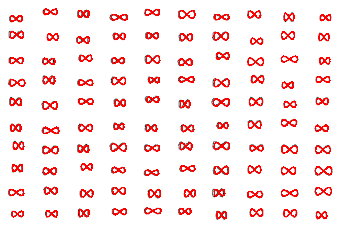

In [12]:
test_dataset = DonutDataset(length = 100)

DonutDataset.displayCanvas('testsetfit-points.png',test_dataset, model = model)


In [13]:
val_dataset = DonutDataset(length = 64)
loader_val = data.DataLoader(
    dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=val_dataset),
    num_workers=4)


max min x tensor(30.4107) tensor(1.7567)
max min y tensor(28.7191) tensor(3.0936)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


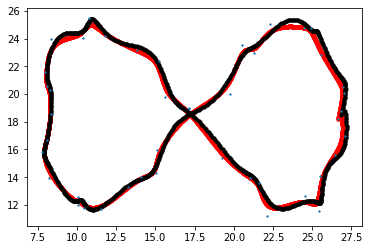

In [16]:
from scipy.interpolate import splprep, splev
from numpy import arange, cos, linspace, pi, sin, random

#display fits on validation set
xgt = None
ygt = None

out = None


for xin,yin in loader_val:
  out = model(xin.cuda(),yin[:,:,:2].cuda())
  xgt = yin[:,:,0]
  ygt = yin[:,:,1]
out = out[1,:,:]
xpred = out[:,0].detach()
ypred = out[:,1].detach()
print(out.shape)
xgt=xgt[1,:]
ygt=ygt[1,:]

t=np.linspace(0,1,1000)
z = t

# spline parameters
s=55 # smoothness parameter
k=3 # spline order
nest=-1 # estimate of number of knots needed (-1 = maximal)

# find the knot points
tck,u = splprep([xpred.cpu().numpy(),ypred.cpu().numpy(),z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = splev(linspace(0,1,4000),tck)

ascatter = plt.scatter(xnew,ynew,s=10,c='red')
ascatter = plt.scatter(xgt.cpu().numpy(),ygt.cpu().numpy(),s=10,c='black')
ascatter = plt.scatter(tck[1][0],tck[1][1],s=1)
plt.gca().add_artist(ascatter)
